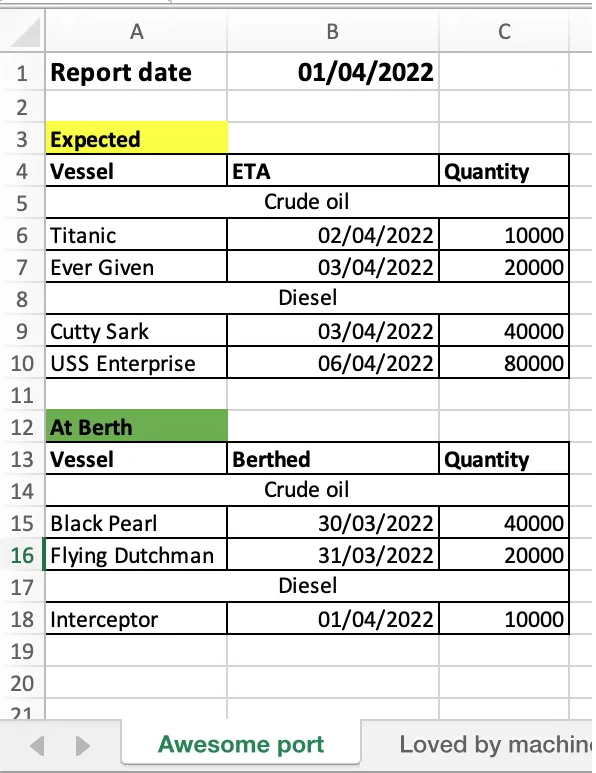

In [1]:
# let's try it with a simple example. So that we can understand how we can do it for other files, here the data is semi-structured data.

from PIL import Image

# Assuming the image is named 'my_image.jpg' and is in the Colab environment
img = Image.open('/content/Screenshot 2025-06-02 114343.png')
img.show() # This may not work directly in Colab, but you can display it

# To display the image within the notebook, you can use IPython.display
from IPython.display import display
display(img)

- To parse the provided Excel file and transform it into the desired structured format, we'll use Python with the openpyxl library. The solution involves reading the semi-structured data, processing it by tracking sections and cargo types, and formatting the output to match the target table structure.

# The Goal: From Messy to Tidy Excel

- Imagine you have an Excel file, let's call it "Awesome port.xlsx," which lists details about ships and their cargo at a port. But the information might be a bit scattered. This code's main job is to read that messy file, pull out the important bits like ship names, cargo types, dates, and quantities, and then save all that information into a brand-new, well-organized Excel file called "Parsed_Output.xlsx."

# The Tools It Uses

- The code uses a special Python library called openpyxl. Think of openpyxl as a set of tools that allows Python to talk to Excel files – reading from them, writing to them, and even changing how they look.

In [10]:
import openpyxl
import datetime

def parse_excel_to_table(file_path):
    # Load the workbook and select the sheet
    wb = openpyxl.load_workbook('/content/Awesome port.xlsx', data_only=True)
    ws = wb.active  # Assumes the target sheet is active (or only sheet)

    # Extract report date from cell B1 and format if it's a datetime object
    report_date = ws['B1'].value
    if isinstance(report_date, datetime.datetime):
        report_date = report_date.strftime("%d/%m/%Y")

    # Initialize variables
    data = []
    current_section = None
    current_cargo = None

    # Iterate through each row
    for row in ws.iter_rows(values_only=True):
        # Skip empty rows
        if all(cell is None for cell in row):
            continue

        # Detect section headers ('Expected' or 'At Berth')
        if row[0] == "Expected":
            current_section = "Expected"
            current_cargo = None
            continue
        elif row[0] == "At Berth":
            current_section = "At Berth"
            current_cargo = None
            continue

        # Process rows within a section
        if current_section:
            # Detect cargo type ('Crude oil' or 'Diesel')
            if row[0] in ["Crude oil", "Diesel"]:
                current_cargo = row[0]
                continue

            # Skip header rows (e.g., "Vessel", "ETA", "Quantity")
            if row[0] == "Vessel":
                continue

            # Process vessel data rows
            if current_cargo and row[0] and isinstance(row[0], str) and row[0].strip():
                vessel = row[0].strip()
                date_val = row[1]
                quantity = row[2]

                # Format date if it's a datetime object
                if isinstance(date_val, datetime.datetime):
                    date_val = date_val.strftime("%d/%m/%Y")
                # Convert quantity to integer string if numeric
                quantity_str = str(int(quantity)) if isinstance(quantity, (int, float)) else str(quantity)

                # Create the output record
                record = [
                    report_date,
                    current_section,
                    vessel,
                    date_val,
                    current_cargo,
                    quantity_str,
                    "Awesome port"  # Port name from sheet name
                ]
                data.append(record)

    return data

# Example usage
if __name__ == "__main__":
    file_path = "/content/Awesome port.xlsx"
    parsed_data = parse_excel_to_table(file_path)

    # Define headers for the output table
    headers = ["Report date", "Status", "Vessel", "ETA/Berthed", "Cargo", "Quantity", "Port"]

    # Print the table in markdown format
    print("| " + " | ".join(headers) + " |")
    print("| " + " | ".join(["---"] * len(headers)) + " |")
    for row in parsed_data:
        print("| " + " | ".join(str(item) for item in row) + " |")

| Report date | Status | Vessel | ETA/Berthed | Cargo | Quantity | Port |
| --- | --- | --- | --- | --- | --- | --- |
| 01/04/2022 | Expected | Titanic | 02/04/2022 | Crude oil | 10000 | Awesome port |
| 01/04/2022 | Expected | Ever Given | 03/04/2022 | Crude oil | 20000 | Awesome port |
| 01/04/2022 | Expected | Cutty Sark | 03/04/2022 | Diesel | 40000 | Awesome port |
| 01/04/2022 | Expected | USS Enterprise | 06/04/2022 | Diesel | 80000 | Awesome port |
| 01/04/2022 | At Berth | Black Pearl | 30/03/2022 | Crude oil | 40000 | Awesome port |
| 01/04/2022 | At Berth | Flying Dutchman | 31/03/2022 | Crude oil | 20000 | Awesome port |
| 01/04/2022 | At Berth | Interceptor | 01/04/2022 | Diesel | 10000 | Awesome port |


In [11]:
import openpyxl
from openpyxl import Workbook
import datetime

def parse_excel_to_table(file_path):
    wb = openpyxl.load_workbook('/content/Awesome port.xlsx', data_only=True)
    ws = wb.active

    # Extract report date from cell B1
    report_date = ws['B1'].value
    if isinstance(report_date, datetime.datetime):
        report_date = report_date.strftime("%d/%m/%Y")

    data = []
    current_section = None
    current_cargo = None

    for row in ws.iter_rows(values_only=True):
        if all(cell is None for cell in row):
            continue

        if row[0] == "Expected":
            current_section = "Expected"
            current_cargo = None
            continue
        elif row[0] == "At Berth":
            current_section = "At Berth"
            current_cargo = None
            continue

        if current_section:
            if row[0] in ["Crude oil", "Diesel"]:
                current_cargo = row[0]
                continue

            if row[0] == "Vessel":
                continue

            if current_cargo and row[0] and isinstance(row[0], str) and row[0].strip():
                vessel = row[0].strip()
                date_val = row[1]
                quantity = row[2]

                if isinstance(date_val, datetime.datetime):
                    date_val = date_val.strftime("%d/%m/%Y")

                quantity_str = str(int(quantity)) if isinstance(quantity, (int, float)) else str(quantity)

                data.append([
                    report_date,
                    current_section,
                    vessel,
                    date_val,
                    current_cargo,
                    quantity_str,
                    "Awesome port"
                ])

    return data

def save_to_excel(data, output_file):
    wb = Workbook()
    ws = wb.active
    ws.title = "Parsed Data"

    # Write headers
    headers = ["Report date", "Status", "Vessel", "ETA/Berthed", "Cargo", "Quantity", "Port"]
    ws.append(headers)

    # Write data
    for row in data:
        ws.append(row)

    # Adjust column widths
    for column in range(1, 8):
        col_letter = openpyxl.utils.get_column_letter(column)
        ws.column_dimensions[col_letter].width = 15

    wb.save(output_file)

if __name__ == "__main__":
    input_file = '/content/Awesome port.xlsx'
    output_file = "Parsed_Output.xlsx"

    parsed_data = parse_excel_to_table(input_file)
    save_to_excel(parsed_data, output_file)
    print(f"Data successfully saved to {output_file}")

Data successfully saved to Parsed_Output.xlsx


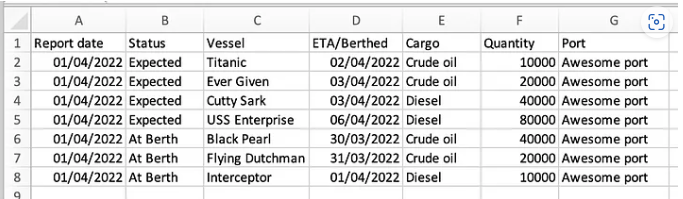

In [12]:
from PIL import Image

# Assuming the image is named 'my_image.jpg' and is in the Colab environment
img = Image.open('/content/Screenshot 2025-06-02 120010.png')
img.show() # This may not work directly in Colab, but you can display it

# To display the image within the notebook, you can use IPython.display
from IPython.display import display
display(img)

# Conclusion:

1. Opens your "Awesome port.xlsx" file.

2. Scans it to understand its structure (sections, cargo types).

3. Extracts specific pieces of information (vessel, date, quantity) for each relevant entry.

4. Organizes all this extracted data into a clear, tabular format.

5. Creates a brand new Excel file ("Parsed_Output.xlsx").

6. Puts the organized data into this new file with proper headers and nicely sized columns.